# Rehla's AI Modeling
We will be using the data set we prepared. The database was collected by researchers and it is a real life public transport data set. We have made some changes in the data set and gather up the data that can be used in a machine learning model into a single table. For the data preperation you can refer to the Neom DataSet Preperation for further insights.

And you can refer the research to get a general idea of the data and how is it being collected and how does it work. <br>
Link : https://www.nature.com/articles/sdata201889

### Data set
Let's take a look into the data set.

In [238]:
import pandas as pd
pd.set_option('display.max_columns', 50)

In [239]:
df = pd.read_csv('data/NeomDataSet_disrubtion.csv')

In [240]:
df

,from_stop_I,to_stop_I,dep_time_ut,arr_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,trip_duration_mins,d,duration_avg,n_vehicles,route_I_counts,dep_date,arr_date,disrubtion,duration_avg_disrubtion,delay
0,2933,2911,1461548700,1461548880,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),3.0,2011.0,2.319648,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,2016-04-25 01:48:00,other,62.319648,60.0
1,6507,6297,1461548820,1461548940,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2.0,2108.0,2.254717,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,2016-04-25 01:49:00,other,62.254717,60.0
2,2911,1414,1461548880,1461549000,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),2.0,1500.0,2.358824,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,2016-04-25 01:50:00,other,62.358824,60.0
3,1878,1880,1461549000,1461549180,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),3.0,1639.0,2.440000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,2016-04-25 01:53:00,other,62.440000,60.0
4,6297,5478,1461549000,1461550260,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",21.0,10443.0,21.000000,1.0,1233:1,2016-04-25 01:50:00,2016-04-25 02:11:00,other,81.000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,1462148520,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4.0,4916.0,3.605263,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00,2016-05-02 00:22:00,none,3.605263,0.0
493260,521,356,1462148640,1462149000,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6.0,6897.0,5.089286,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00,2016-05-02 00:30:00,none,5.089286,0.0
493261,356,188,1462149060,1462149480,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),7.0,6382.0,8.200000,10.0,1281:10,2016-05-02 00:31:00,2016-05-02 00:38:00,none,8.200000,0.0
493262,188,2391,1462149540,1462150200,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),11.0,8551.0,10.000000,1.0,1321:1,2016-05-02 00:39:00,2016-05-02 00:50:00,none,10.000000,0.0


We have around half a million of records of different trips with all the information needed to make a model.

Let's check for null values in the dataset. 

In [241]:
df.isna().sum()

from_stop_I                0
to_stop_I                  0
dep_time_ut                0
arr_time_ut                0
route_type                 0
trip_I                     0
seq                        0
route_I                    0
lat_from                   0
lon_from                   0
name_from                  0
lat_to                     0
lon_to                     0
name_to                    0
trip_duration_mins         0
d                          0
duration_avg               0
n_vehicles                 0
route_I_counts             0
dep_date                   0
arr_date                   0
disrubtion                 0
duration_avg_disrubtion    0
delay                      0
dtype: int64

No null values which is great!
Now we should bring the light into something really important before starting creating the model.
Creating a Machine Learning Model is not something difficult, but understanding how the data is being collected and fed to the model is no easy task. And based on your understanding of the data you should create the model. For example, here in our data set if we are going to predict the arr_time_ut which is the arrival time. We should not train with a data set that contains the trip_duration_mins because this column exists only after the trip arrives. Thus, it will not be a productive model when we put in real life. This is one example and many can be encountered when we start modeling. <br> <br>
Let's take a look into some of the columns

In [242]:
df[['trip_duration_mins','duration_avg','dep_date','dep_time_ut','arr_date','arr_time_ut','route_I_counts']]

,trip_duration_mins,duration_avg,dep_date,dep_time_ut,arr_date,arr_time_ut,route_I_counts
0,3.0,2.319648,2016-04-25 01:45:00,1461548700,2016-04-25 01:48:00,1461548880,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,..."
1,2.0,2.254717,2016-04-25 01:47:00,1461548820,2016-04-25 01:49:00,1461548940,"1232:32,1233:20,1234:17,1276:21,1231:16"
2,2.0,2.358824,2016-04-25 01:48:00,1461548880,2016-04-25 01:50:00,1461549000,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10..."
3,3.0,2.440000,2016-04-25 01:50:00,1461549000,2016-04-25 01:53:00,1461549180,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1..."
4,21.0,21.000000,2016-04-25 01:50:00,1461549000,2016-04-25 02:11:00,1461550260,1233:1
...,...,...,...,...,...,...,...
493259,4.0,3.605263,2016-05-02 00:18:00,1462148280,2016-05-02 00:22:00,1462148520,"1226:18,1235:1,1230:19"
493260,6.0,5.089286,2016-05-02 00:24:00,1462148640,2016-05-02 00:30:00,1462149000,"1281:10,1226:16,1340:20,1229:10"
493261,7.0,8.200000,2016-05-02 00:31:00,1462149060,2016-05-02 00:38:00,1462149480,1281:10
493262,11.0,10.000000,2016-05-02 00:39:00,1462149540,2016-05-02 00:50:00,1462150200,1321:1


trip_duration_mins and duration_avg are both representing the duration but in minutes
we will recalculate the trip_duration_mins but in minutes and we will converts the duration_avg into seconds

In [243]:
df["duration_avg"] = df["duration_avg"]*60

In [244]:
df['trip_duration_sec'] = df['arr_time_ut'] - df['dep_time_ut']

In [245]:
df[['trip_duration_mins','trip_duration_sec','duration_avg',
    'dep_date','dep_time_ut','arr_date',
    'arr_time_ut','route_I_counts']]

,trip_duration_mins,trip_duration_sec,duration_avg,dep_date,dep_time_ut,arr_date,arr_time_ut,route_I_counts
0,3.0,180,139.178886,2016-04-25 01:45:00,1461548700,2016-04-25 01:48:00,1461548880,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,..."
1,2.0,120,135.283019,2016-04-25 01:47:00,1461548820,2016-04-25 01:49:00,1461548940,"1232:32,1233:20,1234:17,1276:21,1231:16"
2,2.0,120,141.529412,2016-04-25 01:48:00,1461548880,2016-04-25 01:50:00,1461549000,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10..."
3,3.0,180,146.400000,2016-04-25 01:50:00,1461549000,2016-04-25 01:53:00,1461549180,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1..."
4,21.0,1260,1260.000000,2016-04-25 01:50:00,1461549000,2016-04-25 02:11:00,1461550260,1233:1
...,...,...,...,...,...,...,...,...
493259,4.0,240,216.315789,2016-05-02 00:18:00,1462148280,2016-05-02 00:22:00,1462148520,"1226:18,1235:1,1230:19"
493260,6.0,360,305.357143,2016-05-02 00:24:00,1462148640,2016-05-02 00:30:00,1462149000,"1281:10,1226:16,1340:20,1229:10"
493261,7.0,420,492.000000,2016-05-02 00:31:00,1462149060,2016-05-02 00:38:00,1462149480,1281:10
493262,11.0,660,600.000000,2016-05-02 00:39:00,1462149540,2016-05-02 00:50:00,1462150200,1321:1


In [246]:
df.drop(columns=['trip_duration_mins'], inplace=True)

As you can see here the different between the trip_duration_sec and duration_avg is that we calculated the trip duration manually in trip_duration_sec based on the time and because the time is rounded into minutes the trip duration will be rounded also 

We will drop one of them but first we will assume that the deperture time is fixed and will add the duration avg time to the arrival time

In [247]:
df['arr_time_ut']=df['dep_time_ut']+df['duration_avg']
df['arr_date']= pd.to_datetime(df["arr_time_ut"],unit='s')
df

,from_stop_I,to_stop_I,dep_time_ut,arr_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date,arr_date,disrubtion,duration_avg_disrubtion,delay,trip_duration_sec
0,2933,2911,1461548700,1.461549e+09,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,139.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,2016-04-25 01:47:19.178885698,other,62.319648,60.0,180
1,6507,6297,1461548820,1.461549e+09,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,135.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,2016-04-25 01:49:15.283018827,other,62.254717,60.0,120
2,2911,1414,1461548880,1.461549e+09,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,141.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,2016-04-25 01:50:21.529411792,other,62.358824,60.0,120
3,1878,1880,1461549000,1.461549e+09,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,146.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,2016-04-25 01:52:26.400000095,other,62.440000,60.0,180
4,6297,5478,1461549000,1.461550e+09,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1260.000000,1.0,1233:1,2016-04-25 01:50:00,2016-04-25 02:11:00.000000000,other,81.000000,60.0,1260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,1.462148e+09,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4916.0,216.315789,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00,2016-05-02 00:21:36.315789461,none,3.605263,0.0,240
493260,521,356,1462148640,1.462149e+09,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6897.0,305.357143,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00,2016-05-02 00:29:05.357142925,none,5.089286,0.0,360
493261,356,188,1462149060,1.462150e+09,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),6382.0,492.000000,10.0,1281:10,2016-05-02 00:31:00,2016-05-02 00:39:12.000000000,none,8.200000,0.0,420
493262,188,2391,1462149540,1.462150e+09,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),8551.0,600.000000,1.0,1321:1,2016-05-02 00:39:00,2016-05-02 00:49:00.000000000,none,10.000000,0.0,660


In [248]:
df[['trip_duration_sec','duration_avg',
    'dep_date','dep_time_ut','arr_date',
    'arr_time_ut','route_I_counts']]

,trip_duration_sec,duration_avg,dep_date,dep_time_ut,arr_date,arr_time_ut,route_I_counts
0,180,139.178886,2016-04-25 01:45:00,1461548700,2016-04-25 01:47:19.178885698,1.461549e+09,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,..."
1,120,135.283019,2016-04-25 01:47:00,1461548820,2016-04-25 01:49:15.283018827,1.461549e+09,"1232:32,1233:20,1234:17,1276:21,1231:16"
2,120,141.529412,2016-04-25 01:48:00,1461548880,2016-04-25 01:50:21.529411792,1.461549e+09,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10..."
3,180,146.400000,2016-04-25 01:50:00,1461549000,2016-04-25 01:52:26.400000095,1.461549e+09,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1..."
4,1260,1260.000000,2016-04-25 01:50:00,1461549000,2016-04-25 02:11:00.000000000,1.461550e+09,1233:1
...,...,...,...,...,...,...,...
493259,240,216.315789,2016-05-02 00:18:00,1462148280,2016-05-02 00:21:36.315789461,1.462148e+09,"1226:18,1235:1,1230:19"
493260,360,305.357143,2016-05-02 00:24:00,1462148640,2016-05-02 00:29:05.357142925,1.462149e+09,"1281:10,1226:16,1340:20,1229:10"
493261,420,492.000000,2016-05-02 00:31:00,1462149060,2016-05-02 00:39:12.000000000,1.462150e+09,1281:10
493262,660,600.000000,2016-05-02 00:39:00,1462149540,2016-05-02 00:49:00.000000000,1.462150e+09,1321:1


In [249]:
df.drop(columns=['trip_duration_sec'],inplace=True)

In [250]:
df

,from_stop_I,to_stop_I,dep_time_ut,arr_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date,arr_date,disrubtion,duration_avg_disrubtion,delay
0,2933,2911,1461548700,1.461549e+09,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,139.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,2016-04-25 01:47:19.178885698,other,62.319648,60.0
1,6507,6297,1461548820,1.461549e+09,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,135.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,2016-04-25 01:49:15.283018827,other,62.254717,60.0
2,2911,1414,1461548880,1.461549e+09,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,141.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,2016-04-25 01:50:21.529411792,other,62.358824,60.0
3,1878,1880,1461549000,1.461549e+09,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,146.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,2016-04-25 01:52:26.400000095,other,62.440000,60.0
4,6297,5478,1461549000,1.461550e+09,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1260.000000,1.0,1233:1,2016-04-25 01:50:00,2016-04-25 02:11:00.000000000,other,81.000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,1.462148e+09,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4916.0,216.315789,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00,2016-05-02 00:21:36.315789461,none,3.605263,0.0
493260,521,356,1462148640,1.462149e+09,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6897.0,305.357143,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00,2016-05-02 00:29:05.357142925,none,5.089286,0.0
493261,356,188,1462149060,1.462150e+09,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),6382.0,492.000000,10.0,1281:10,2016-05-02 00:31:00,2016-05-02 00:39:12.000000000,none,8.200000,0.0
493262,188,2391,1462149540,1.462150e+09,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),8551.0,600.000000,1.0,1321:1,2016-05-02 00:39:00,2016-05-02 00:49:00.000000000,none,10.000000,0.0


We will be predicting the duration_avg <br>
So we will be dropping the arrival time and date

In [251]:
df_data = df.drop(columns=['arr_time_ut','arr_date'])

In [252]:
df_data

,from_stop_I,to_stop_I,dep_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date,disrubtion,duration_avg_disrubtion,delay
0,2933,2911,1461548700,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,139.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,other,62.319648,60.0
1,6507,6297,1461548820,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,135.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,other,62.254717,60.0
2,2911,1414,1461548880,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,141.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,other,62.358824,60.0
3,1878,1880,1461549000,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,146.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,other,62.440000,60.0
4,6297,5478,1461549000,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1260.000000,1.0,1233:1,2016-04-25 01:50:00,other,81.000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4916.0,216.315789,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00,none,3.605263,0.0
493260,521,356,1462148640,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6897.0,305.357143,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00,none,5.089286,0.0
493261,356,188,1462149060,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),6382.0,492.000000,10.0,1281:10,2016-05-02 00:31:00,none,8.200000,0.0
493262,188,2391,1462149540,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),8551.0,600.000000,1.0,1321:1,2016-05-02 00:39:00,none,10.000000,0.0


In [253]:
df_data[df_data.disrubtion == "brake"][['disrubtion','duration_avg_disrubtion','duration_avg','delay']]

,disrubtion,duration_avg_disrubtion,duration_avg,delay
25158,brake,601.380822,82.849315,600.0
25159,brake,603.926829,235.609756,600.0
25160,brake,607.000000,420.000000,600.0
25161,brake,601.000000,60.000000,600.0
25162,brake,603.000000,180.000000,600.0
...,...,...,...,...
37238,brake,603.748454,224.907216,600.0
37239,brake,603.000000,180.000000,600.0
37240,brake,602.000000,120.000000,600.0
37241,brake,601.857143,111.428571,600.0


In [254]:
df_data['duration_avg_disrubtion'] = df_data['delay'] + df_data['duration_avg']

In [255]:
df_data[df_data.disrubtion == "brake"][['disrubtion','duration_avg_disrubtion','duration_avg','delay']]

,disrubtion,duration_avg_disrubtion,duration_avg,delay
25158,brake,682.849315,82.849315,600.0
25159,brake,835.609756,235.609756,600.0
25160,brake,1020.000000,420.000000,600.0
25161,brake,660.000000,60.000000,600.0
25162,brake,780.000000,180.000000,600.0
...,...,...,...,...
37238,brake,824.907216,224.907216,600.0
37239,brake,780.000000,180.000000,600.0
37240,brake,720.000000,120.000000,600.0
37241,brake,711.428571,111.428571,600.0


In [256]:
df_data.disrubtion.value_counts(normalize=True)

none         0.899997
other        0.050002
brake        0.024500
door         0.024500
fire         0.000501
collision    0.000501
Name: disrubtion, dtype: float64

In [257]:
df_raw = df_data.copy()

In [258]:
df_data['duration_avg'] = df_data['duration_avg_disrubtion']

In [259]:
df_data.drop(columns='duration_avg_disrubtion',inplace=True)

We will be dropping everything related to the disrubtion for the sake of training because it does not make sense to keep them in the data set in process of training. As you know when you predict the duration time we will not know if the train will be late or not. So, we should drop them and try it out. 

In [260]:
df_data.drop(columns=['disrubtion','delay'],inplace=True)

In [261]:
df_data

,from_stop_I,to_stop_I,dep_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date
0,2933,2911,1461548700,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,199.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00
1,6507,6297,1461548820,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,195.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00
2,2911,1414,1461548880,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,201.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00
3,1878,1880,1461549000,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,206.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00
4,6297,5478,1461549000,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1320.000000,1.0,1233:1,2016-04-25 01:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4916.0,216.315789,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00
493260,521,356,1462148640,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6897.0,305.357143,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00
493261,356,188,1462149060,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),6382.0,492.000000,10.0,1281:10,2016-05-02 00:31:00
493262,188,2391,1462149540,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),8551.0,600.000000,1.0,1321:1,2016-05-02 00:39:00


## Modeling

### Random Forest

### Imports

In [262]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

Adding date parts to the data set

In [263]:
df_data.dep_date.describe()

count                  493264
unique                   9508
top       2016-04-25 06:18:00
freq                      108
Name: dep_date, dtype: object

In [264]:
add_datepart(df_data, fldnames='dep_date', time=True, drop=False)

In [265]:
df_data

,from_stop_I,to_stop_I,dep_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date,dep_Year,dep_Month,dep_Week,dep_Day,dep_Dayofweek,dep_Dayofyear,dep_Is_month_end,dep_Is_month_start,dep_Is_quarter_end,dep_Is_quarter_start,dep_Is_year_end,dep_Is_year_start,dep_Hour,dep_Minute,dep_Second,dep_Elapsed
0,2933,2911,1461548700,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,199.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,45,0,1461548700
1,6507,6297,1461548820,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,195.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,47,0,1461548820
2,2911,1414,1461548880,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,201.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,48,0,1461548880
3,1878,1880,1461549000,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,206.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,50,0,1461549000
4,6297,5478,1461549000,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1320.000000,1.0,1233:1,2016-04-25 01:50:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,50,0,1461549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4916.0,216.315789,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,18,0,1462148280
493260,521,356,1462148640,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6897.0,305.357143,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,24,0,1462148640
493261,356,188,1462149060,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),6382.0,492.000000,10.0,1281:10,2016-05-02 00:31:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,31,0,1462149060
493262,188,2391,1462149540,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),8551.0,600.000000,1.0,1321:1,2016-05-02 00:39:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,39,0,1462149540


In [266]:
df_data.dep_Second.describe()

count    493264.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: dep_Second, dtype: float64

In [267]:
df_data.drop(columns=['dep_Second'],inplace=True)

In [268]:
df_data.dep_Month.describe()

count    493264.000000
mean          4.120503
std           0.325550
min           4.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: dep_Month, dtype: float64

In [269]:
df_data.dep_date

0        2016-04-25 01:45:00
1        2016-04-25 01:47:00
2        2016-04-25 01:48:00
3        2016-04-25 01:50:00
4        2016-04-25 01:50:00
                 ...        
493259   2016-05-02 00:18:00
493260   2016-05-02 00:24:00
493261   2016-05-02 00:31:00
493262   2016-05-02 00:39:00
493263   2016-05-02 02:00:00
Name: dep_date, Length: 493264, dtype: datetime64[ns]

In [270]:
df_data

,from_stop_I,to_stop_I,dep_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date,dep_Year,dep_Month,dep_Week,dep_Day,dep_Dayofweek,dep_Dayofyear,dep_Is_month_end,dep_Is_month_start,dep_Is_quarter_end,dep_Is_quarter_start,dep_Is_year_end,dep_Is_year_start,dep_Hour,dep_Minute,dep_Elapsed
0,2933,2911,1461548700,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,199.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,45,1461548700
1,6507,6297,1461548820,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,195.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,47,1461548820
2,2911,1414,1461548880,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,201.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,48,1461548880
3,1878,1880,1461549000,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,206.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,50,1461549000
4,6297,5478,1461549000,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1320.000000,1.0,1233:1,2016-04-25 01:50:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,50,1461549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493259,659,521,1462148280,2,67782,5,1235,52.549450,13.128974,"Berlin, Albrechtshof Bhf",52.534802,13.197482,S Spandau Bhf (Berlin),4916.0,216.315789,38.0,"1226:18,1235:1,1230:19",2016-05-02 00:18:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,18,1462148280
493260,521,356,1462148640,2,67782,6,1235,52.534802,13.197482,S Spandau Bhf (Berlin),52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),6897.0,305.357143,56.0,"1281:10,1226:16,1340:20,1229:10",2016-05-02 00:24:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,24,1462148640
493261,356,188,1462149060,2,67782,7,1235,52.530279,13.299069,S+U Jungfernheide Bhf (Berlin),52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),6382.0,492.000000,10.0,1281:10,2016-05-02 00:31:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,31,1462149060
493262,188,2391,1462149540,2,67782,8,1235,52.548641,13.388377,S+U Gesundbrunnen Bhf (Berlin),52.510758,13.498233,S+U Lichtenberg Bhf (Berlin),8551.0,600.000000,1.0,1321:1,2016-05-02 00:39:00,2016,5,18,2,0,123,False,False,False,False,False,False,0,39,1462149540


In [271]:
df_data.dep_date.min(), df_data.dep_date.max()

(Timestamp('2016-04-25 01:45:00'), Timestamp('2016-05-02 02:00:00'))

In [272]:
print(((((df_data.dep_time_ut.max() - df_data.dep_time_ut.min())/60)/60)/24), 'days')

7.010416666666667 days


To convert all strings into categories 

In [273]:
train_cats(df_data)

In [274]:
df_data.route_I_counts.cat.categories

Index(['1018:62', '1018:62,1054:53', '1018:63,1020:49',
       '1018:63,1020:49,1050:113', '1018:63,1020:50',
       '1018:63,1020:50,1050:112', '1018:64,1020:55', '1018:64,1020:56',
       '1018:65,1020:55', '1018:65,1020:56',
       ...
       '1318:40', '1318:41', '1318:5', '1320:18', '1321:1', '1338:19',
       '1338:21', '1340:18,1279:2', '1340:20,1229:10', '1340:21,1229:10'],
      dtype='object', length=200)

In [275]:
df_data.head()

,from_stop_I,to_stop_I,dep_time_ut,route_type,trip_I,seq,route_I,lat_from,lon_from,name_from,lat_to,lon_to,name_to,d,duration_avg,n_vehicles,route_I_counts,dep_date,dep_Year,dep_Month,dep_Week,dep_Day,dep_Dayofweek,dep_Dayofyear,dep_Is_month_end,dep_Is_month_start,dep_Is_quarter_end,dep_Is_quarter_start,dep_Is_year_end,dep_Is_year_start,dep_Hour,dep_Minute,dep_Elapsed
0,2933,2911,1461548700,2,59855,1,1041,52.454614,13.510155,S Schöneweide Bhf (Berlin),52.467585,13.489511,S Baumschulenweg (Berlin),2011.0,199.178886,341.0,"1057:43,1058:61,1059:4,1036:53,1037:6,1038:64,...",2016-04-25 01:45:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,45,1461548700
1,6507,6297,1461548820,2,67700,1,1233,52.390935,13.067162,S Potsdam Hauptbahnhof,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",2108.0,195.283019,106.0,"1232:32,1233:20,1234:17,1276:21,1231:16",2016-04-25 01:47:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,47,1461548820
2,2911,1414,1461548880,2,59855,2,1041,52.467585,13.489511,S Baumschulenweg (Berlin),52.469172,13.467534,S Köllnische Heide (Berlin),1500.0,201.529412,170.0,"1041:1,1043:2,1044:11,1045:9,1046:21,1047:3,10...",2016-04-25 01:48:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,48,1461548880
3,1878,1880,1461549000,2,69032,1,1282,52.520273,13.387158,S+U Friedrichstr. Bhf (Berlin),52.521516,13.411272,S+U Alexanderplatz Bhf (Berlin),1639.0,206.400000,100.0,"1282:3,1235:1,1301:37,1338:20,1276:2,1309:19,1...",2016-04-25 01:50:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,50,1461549000
4,6297,5478,1461549000,2,67700,2,1233,52.393007,13.036304,"Potsdam, Charlottenhof Bhf",52.323652,13.139744,"Saarmund, Bahnhof",10443.0,1320.000000,1.0,1233:1,2016-04-25 01:50:00,2016,4,17,25,0,116,False,False,False,False,False,False,1,50,1461549000


In [276]:
df, y, nas = proc_df(df_data,'duration_avg')

In [277]:
df.columns

Index(['from_stop_I', 'to_stop_I', 'dep_time_ut', 'route_type', 'trip_I',
       'seq', 'route_I', 'lat_from', 'lon_from', 'name_from', 'lat_to',
       'lon_to', 'name_to', 'd', 'n_vehicles', 'route_I_counts', 'dep_date',
       'dep_Year', 'dep_Month', 'dep_Week', 'dep_Day', 'dep_Dayofweek',
       'dep_Dayofyear', 'dep_Is_month_end', 'dep_Is_month_start',
       'dep_Is_quarter_end', 'dep_Is_quarter_start', 'dep_Is_year_end',
       'dep_Is_year_start', 'dep_Hour', 'dep_Minute', 'dep_Elapsed'],
      dtype='object')

In [278]:
y

array([199.17889, 195.28302, 201.52941, ..., 492.     , 600.     , 911.42857])

In [279]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=10)
m.fit(df, y)
m.score(df,y)

0.995125375493837

Looks Nice but we did not split the data into to sets one for testing and one for training

Now Let's split it

In [280]:
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid = 12000 
n_trn = len(df)-n_valid
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape , df_data.shape

((481264, 32), (481264,), (12000, 32), (493264, 33))

In [281]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [282]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=50,oob_score=True)
%time m.fit(X_train,y_train)
print_score(m)

Wall time: 1min 3s
[9.785420781177361, 0.1470243823650554, 0.9966702663609305, 0.9999968901295844, 0.9761478792338514]


#### Reduce Over-fitting 

In [283]:
set_rf_samples(20000)

In [285]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, max_features='auto', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 49.4 s
[10.31788944585067, 0.1591756255937549, 0.9962980357266028, 0.9999963548391564, 0.974722915188313]


##### Feature importance 

In [286]:
fi = rf_feat_importance(m, df)
fi[:20]

,cols,imp
16,dep_date,3.662054e-01
13,d,3.453363e-01
31,dep_Elapsed,1.137650e-01
2,dep_time_ut,1.047846e-01
30,dep_Minute,1.179822e-02
15,route_I_counts,1.016748e-02
14,n_vehicles,9.636573e-03
1,to_stop_I,9.435704e-03
10,lat_to,4.593332e-03
8,lon_from,4.079123e-03


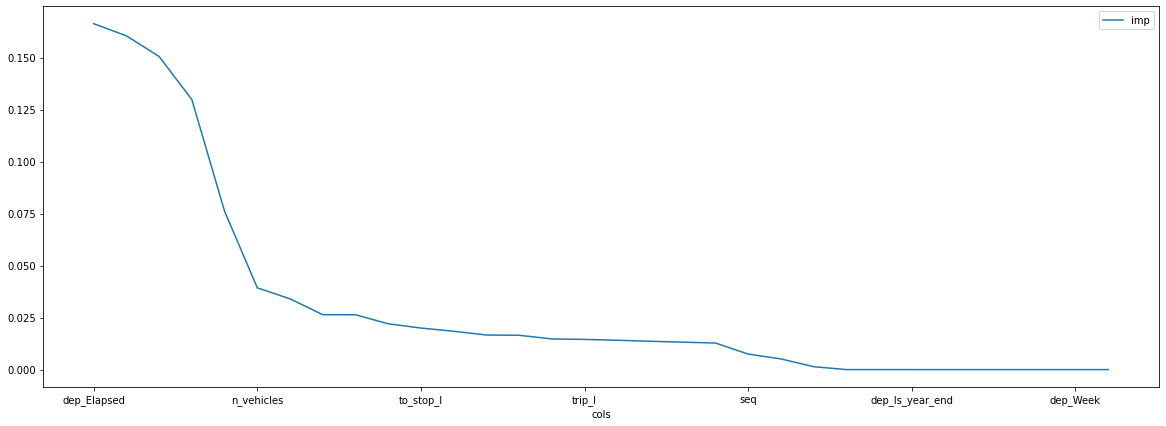

In [235]:
fi.plot('cols', 'imp', figsize=(20,7), legend=True)

In [236]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,10), legend=False)

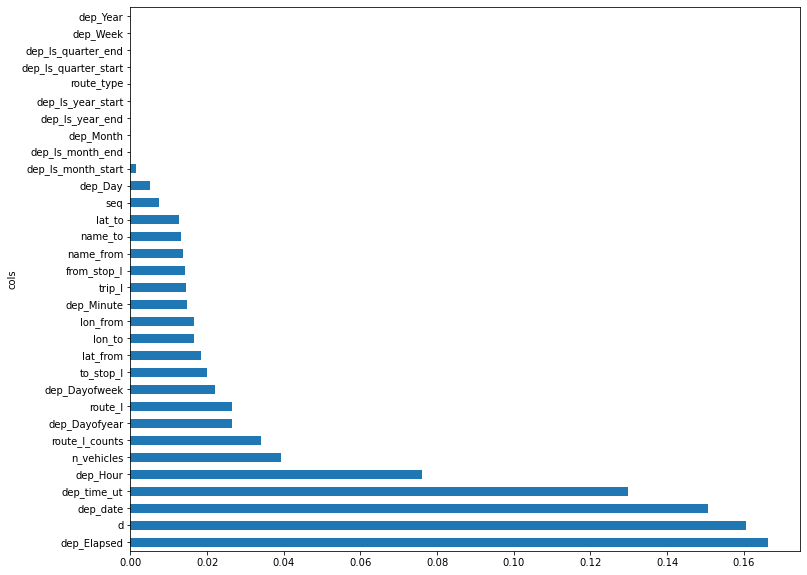

In [237]:
plot_fi(fi[:33])

We will be deleting some of the features that we think are not so important or might cause *over-fitting*. These features are:
* d 
* route_I_counts
* lat_to, lat_from, lon_to, lon_from
* n_vehicles

In [287]:
to_delete = ['d','route_I_counts','lat_to','lat_from','lon_to','lon_from','n_vehicles']

Deleting them all 

In [288]:
to_keep = [item for item in df.columns if item not in to_delete]
to_keep

['from_stop_I',
 'to_stop_I',
 'dep_time_ut',
 'route_type',
 'trip_I',
 'seq',
 'route_I',
 'name_from',
 'name_to',
 'dep_date',
 'dep_Year',
 'dep_Month',
 'dep_Week',
 'dep_Day',
 'dep_Dayofweek',
 'dep_Dayofyear',
 'dep_Is_month_end',
 'dep_Is_month_start',
 'dep_Is_quarter_end',
 'dep_Is_quarter_start',
 'dep_Is_year_end',
 'dep_Is_year_start',
 'dep_Hour',
 'dep_Minute',
 'dep_Elapsed']

In [289]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [290]:
m = RandomForestRegressor(n_estimators=40, max_features='auto', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 41.7 s
[9.817539941709374, 0.5877292476632727, 0.9966483717950478, 0.9999503043732231, 0.9745667979332073]


In [291]:
fi = rf_feat_importance(m, df_keep)
fi[:20]

,cols,imp
9,dep_date,3.467848e-01
24,dep_Elapsed,1.407773e-01
6,route_I,1.115560e-01
2,dep_time_ut,9.666906e-02
8,name_to,7.751623e-02
0,from_stop_I,6.452253e-02
7,name_from,6.448437e-02
1,to_stop_I,4.661158e-02
23,dep_Minute,2.007755e-02
5,seq,1.819241e-02


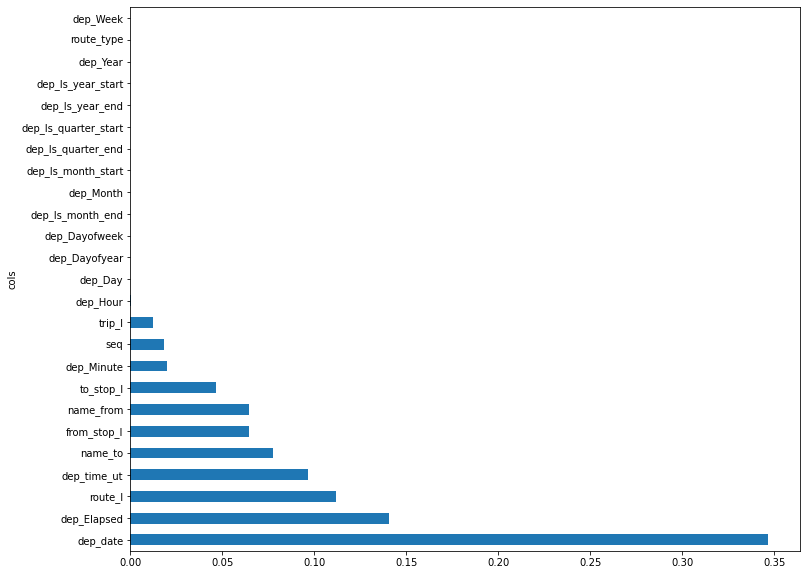

In [292]:
plot_fi(fi[:33])

Deleting them one by one

d
[10.953669992408365, 5.3563903031902, 0.9958277551437407, 0.9958723012303923, 0.9714364670115665]
route_I_counts
[10.013111350422344, 2.2313374416795755, 0.996513508792426, 0.9992837014509207, 0.9732375482444576]
lat_to
[10.539867425492837, 2.3111615750935726, 0.9961370349474008, 0.9992315348403643, 0.9725342435262355]
lat_from
[10.298829574138006, 2.4596085603802615, 0.9963117001090268, 0.9991296467459613, 0.9718473735696791]
lon_to
[10.897640954354985, 2.14498426354693, 0.9958703288192995, 0.9993380704241336, 0.9724934017877652]
lon_from
[10.507464887702815, 2.667954906160766, 0.9961607501351227, 0.9989759514774981, 0.9730161368047963]
n_vehicles
[10.188376231656612, 3.2929984089773874, 0.9963903887556379, 0.9984399209408972, 0.9740599830061208]


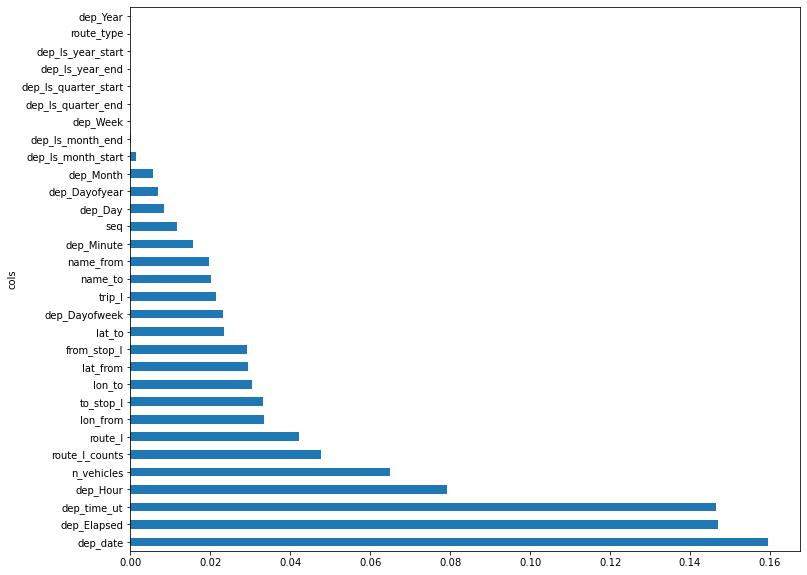

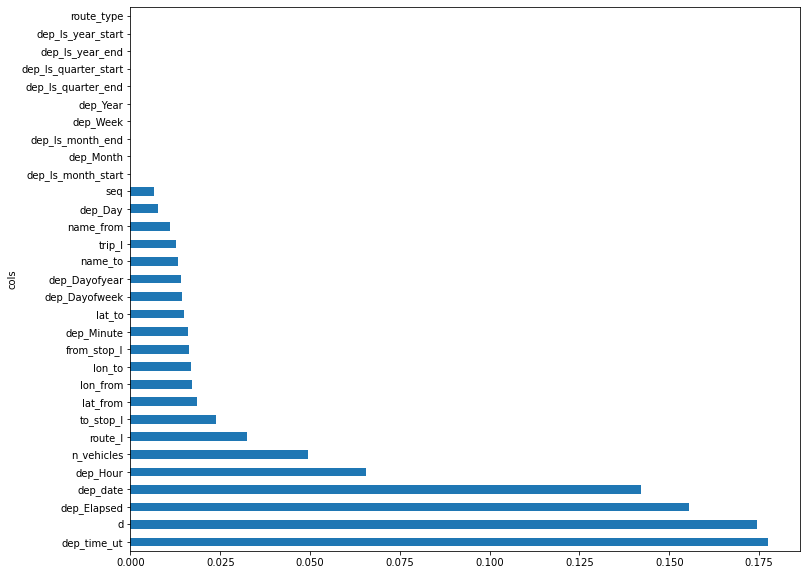

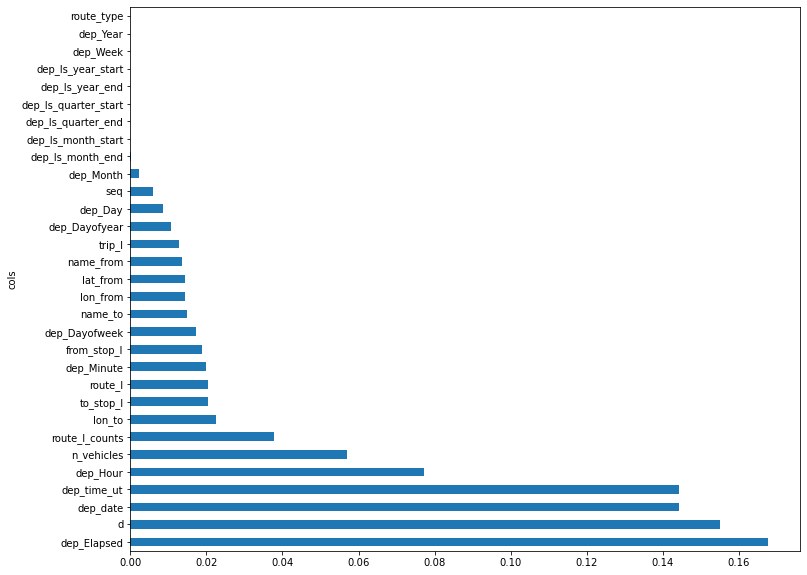

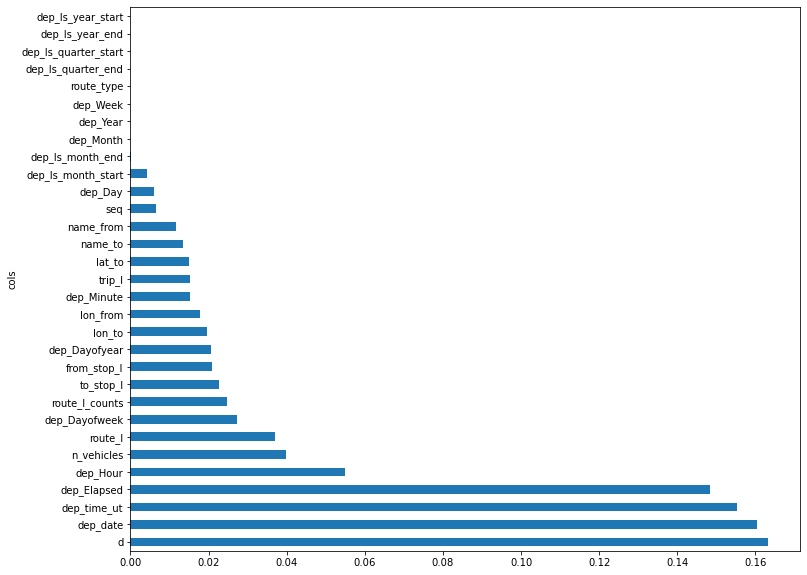

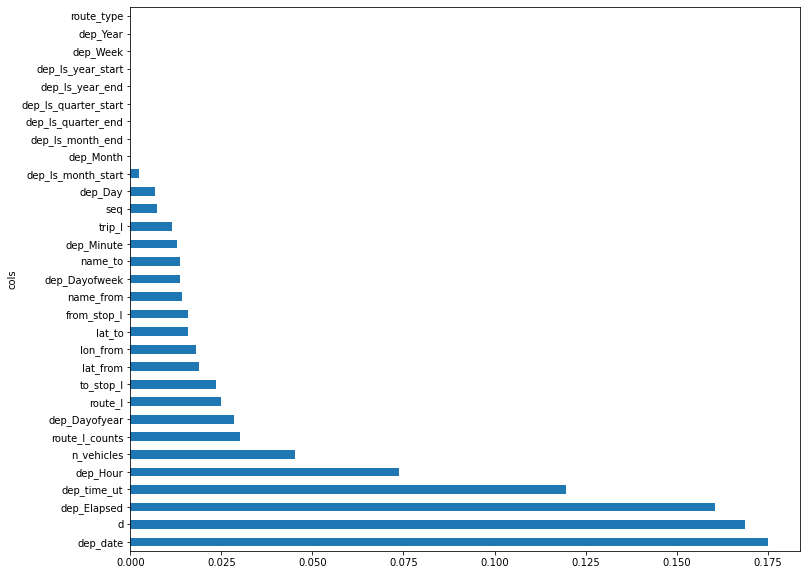

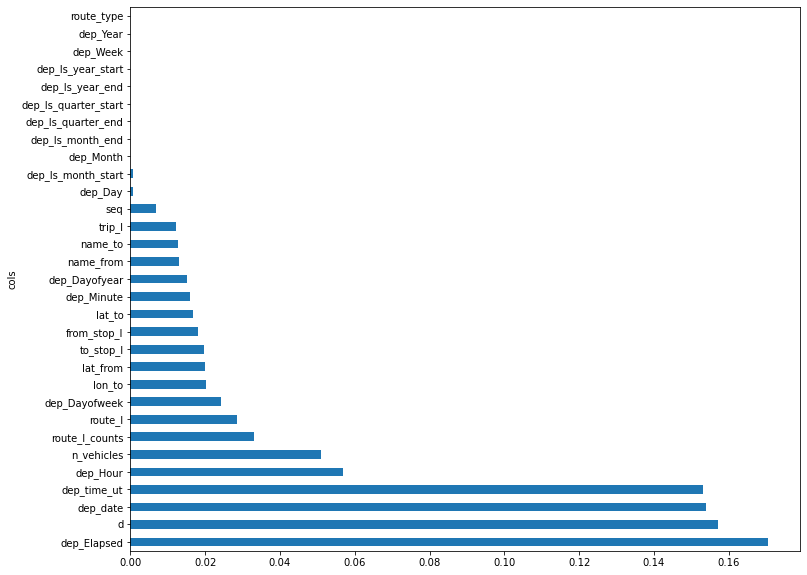

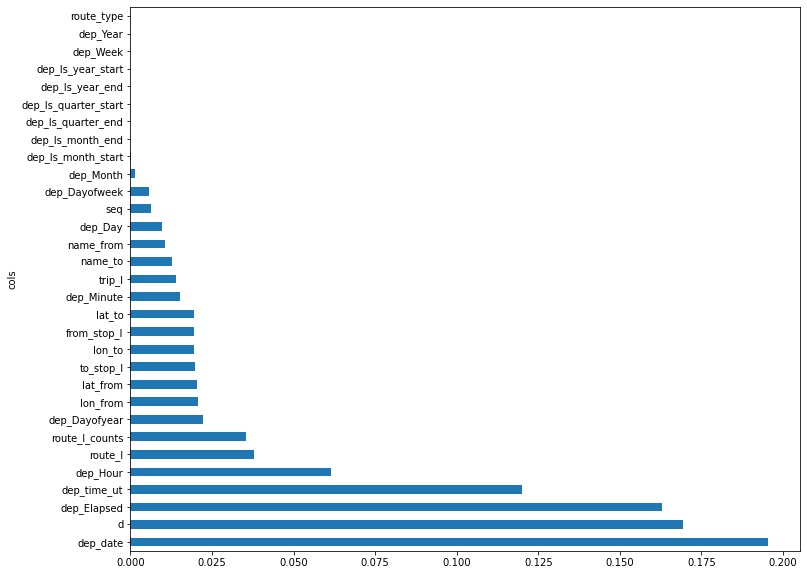

In [293]:
for item in to_delete:
    df_keep = df.drop(columns=item)
    X_train, X_valid = split_vals(df_keep, n_trn)
    m = RandomForestRegressor(n_estimators=40, max_features='sqrt', n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(item)
    print_score(m)
    fi = rf_feat_importance(m, df_keep)
    plot_fi(fi[:33])

We will be dropping the lon and lat since they don't have any major effect and it does not make senes to keep them in the trainning process

In [295]:
df_keep = df.drop(columns=['lat_to','lat_from','lon_to','lon_from'])
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, max_features="auto", n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 39.7 s
[10.252936309775652, 0.21575575898060784, 0.9963444982008, 0.9999933028757065, 0.9741923927445602]


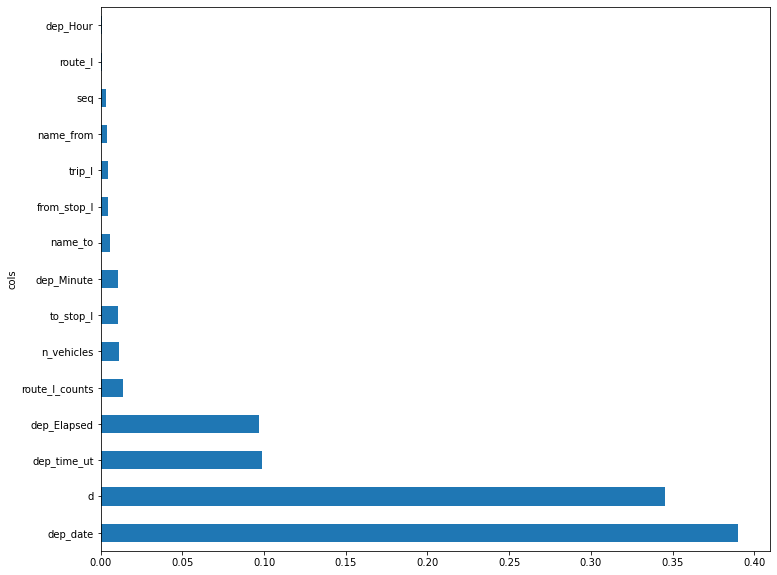

In [296]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi[:15])

In [297]:
fi[:15]

,cols,imp
12,dep_date,0.390314
9,d,0.345249
2,dep_time_ut,0.098668
27,dep_Elapsed,0.096874
11,route_I_counts,0.013661
10,n_vehicles,0.011001
1,to_stop_I,0.010890
26,dep_Minute,0.010415
8,name_to,0.005941
0,from_stop_I,0.004645


In [298]:
to_keep = fi[fi.imp>0.005].cols
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [302]:
m = RandomForestRegressor(n_estimators=40, max_features='auto', n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 22.9 s
[12.691809409965575, 0.1711664430071933, 0.9943985873691018, 0.9999957849685728, 0.9743475043424451]


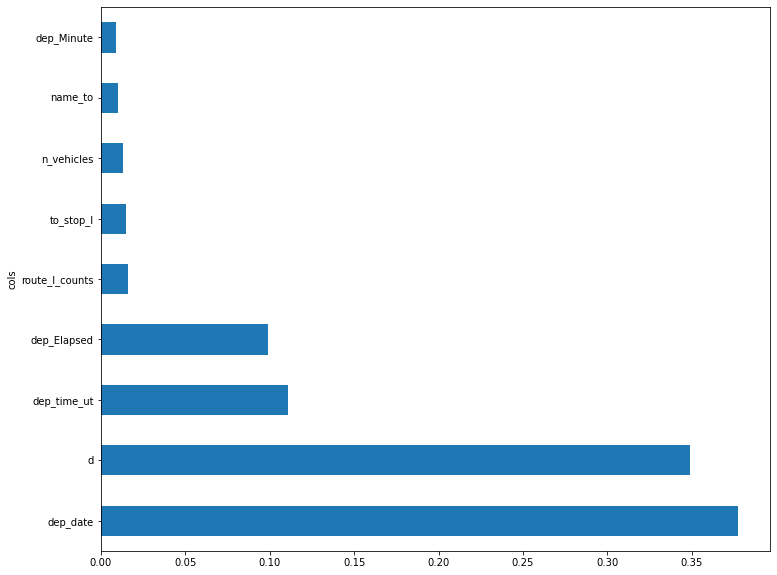

In [305]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

Let's check the redundant features

In [306]:
from scipy.cluster import hierarchy as hc 

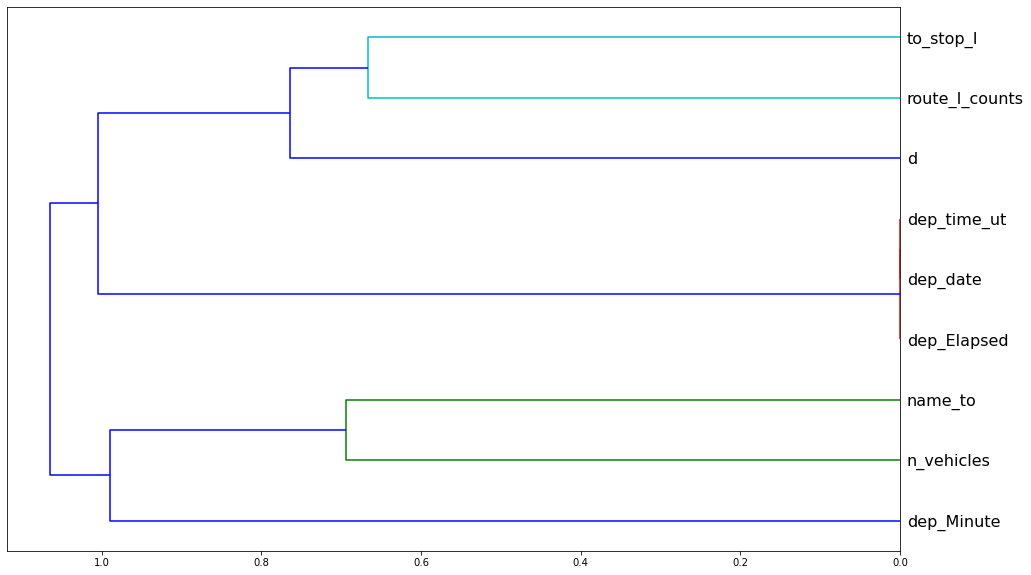

In [307]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr) 
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16) 
plt.show()

dep_date, dep_Elapsed, dep_time_ut seem to be the same. Lets delete some of them

In [308]:
df_keep = df_keep.drop(columns=['dep_time_ut','dep_Elapsed'])
df_keep

,dep_date,d,route_I_counts,n_vehicles,to_stop_I,dep_Minute,name_to
0,1,2011.0,95,341.0,2911,45,35
1,2,2108.0,118,106.0,6297,47,21
2,3,1500.0,51,170.0,1414,48,86
3,4,1639.0,167,100.0,1880,50,162
4,4,10443.0,123,1.0,5478,50,191
...,...,...,...,...,...,...,...
493259,9504,4916.0,105,38.0,521,18,136
493260,9505,6897.0,153,56.0,356,24,174
493261,9506,6382.0,152,10.0,188,31,169
493262,9507,8551.0,195,1.0,2391,39,176


In [309]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, max_features="auto", n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 15.6 s
[12.491403270597514, 0.2769388977034922, 0.9945740855575642, 0.9999889660379959, 0.9741410348899245]


### Gradiant Boosting Machines
We will be trying other algorithms. Here we will try Gradiant Bossting Machines, which is a tree-algorithm just like the RandomForest but it does work sometimes better with time-related data sets.

In [310]:
from sklearn.ensemble import GradientBoostingRegressor

In [311]:
X_train, X_valid = split_vals(df, n_trn)

In [312]:
g = GradientBoostingRegressor(n_estimators=40,max_features='sqrt')
%time g.fit(X_train, y_train)
print_score(g)

Wall time: 12.1 s
[66.80913287926033, 33.09447095658696, 0.8447891229743163, 0.8424296675079713]


In [313]:
g = GradientBoostingRegressor(n_estimators=40,max_features='log2')
%time g.fit(X_train, y_train)
print_score(g)

Wall time: 11.9 s
[73.28514040733192, 36.52775601772411, 0.8132406596357509, 0.8080405255275703]


In [315]:
g = GradientBoostingRegressor(n_estimators=50)
%time g.fit(X_train, y_train)
print_score(g)

Wall time: 1min 19s
[47.09437159055378, 21.49946586572107, 0.922876186590746, 0.9335004193818872]


The accurecy is not bad but the rmse is too high 

#### Let's do feature importance

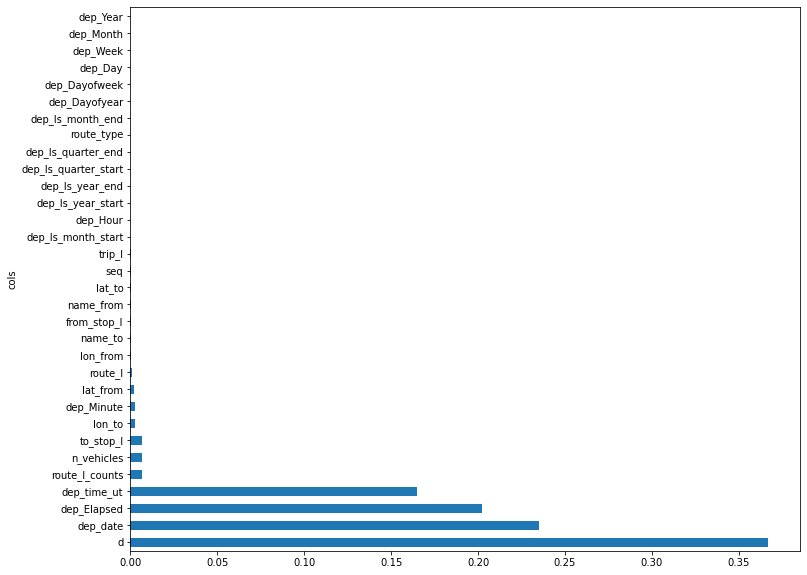

In [316]:
fi = rf_feat_importance(g, df)
plot_fi(fi)

In [317]:
df_grd = df.drop(columns=['d','route_I_counts','n_vehicles','lat_to','lat_from','lon_to','lon_from'])

In [318]:
X_train, X_valid = split_vals(df_grd, n_trn)

In [320]:
g = GradientBoostingRegressor(n_estimators=50)
%time g.fit(X_train, y_train)
print_score(g)

Wall time: 59.2 s
[71.4085554516263, 54.949805585681325, 0.82268275370666, 0.5655939290309245]


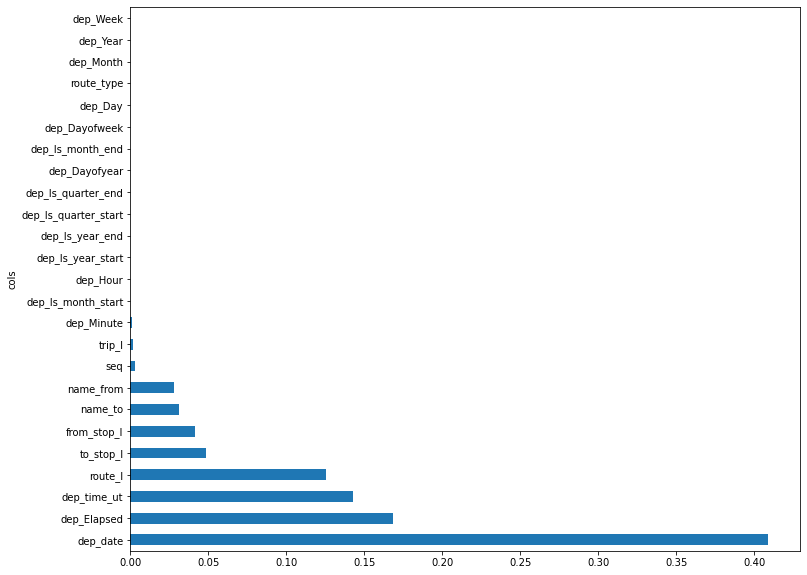

In [321]:
fi = rf_feat_importance(g, df_grd)
plot_fi(fi)

# Exporting Smaple Predicted Data

In [ ]:
predictions =  X_valid
predictions["prediction"] = preds.mean(axis=0)
predictions["scheduled_date"] = y_valid
predictions[:100].to_csv('Predections.csv', encoding='utf-8')

The probelm in this model is that it relies totally on the distance. 

### Supporting Vector Regression
The data must be normlized or standardized to be used in this algorithm

In [347]:
X, Y,nsa = proc_df(df_data,y_fld='duration_avg',subset=50000)

In [348]:
X = X[["dep_date", "d", "route_I_counts", "n_vehicles", "to_stop_I", "dep_Minute", 'name_to']]

In [349]:
X = (X-X.mean())/X.std()
Y = (Y-Y.mean())/Y.std()

In [350]:
from sklearn.svm import SVR

In [351]:
n_valid = 10000 
n_trn = len(X)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(Y, n_trn)

In [352]:
v = SVR()
%time v.fit(X_train, y_train)

Wall time: 38.9 s


SVR()

In [353]:
print_score(v)

[0.8450105093249999, 0.17937348524944113, 0.3835420062102538, 0.905026250263911]


The results are relatively good but the problem is that it takes so much time so that I had to train it with only around %10 of the data set. Even the rmse is really good. It gives us the best rmse from all algorithms. However, because it takes so much time and we only used around 10% of the data set, it is not reliable. Also, the score for the training set is very low. Thus, we will go with the Random Forest model.

### Conclusion

In [335]:
ev = {
    'SVR':[0.8618754182228169, 0.1844930778973628, 0.36059407964671186, 0.8958379481228234],
    'GBR':[47.09437159055378, 21.49946586572107, 0.922876186590746, 0.9335004193818872],
    'RF':[12.491403270597514, 0.2769388977034922, 0.9945740855575642, 0.9999889660379959]
}

In [336]:
df_ev = pd.DataFrame(ev)

In [337]:
df_ev

,SVR,GBR,RF
0,0.861875,47.094372,12.491403
1,0.184493,21.499466,0.276939
2,0.360594,0.922876,0.994574
3,0.895838,0.933500,0.999989


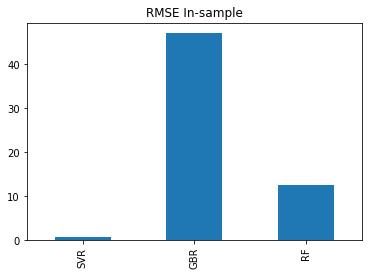

In [338]:
df_ev.iloc[0].plot(kind='bar',title='RMSE In-sample')

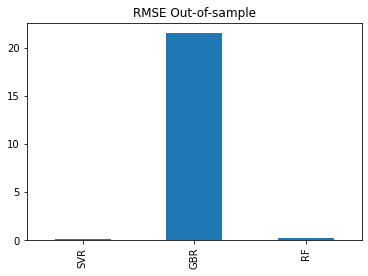

In [339]:
df_ev.iloc[1].plot(kind='bar',title='RMSE Out-of-sample')

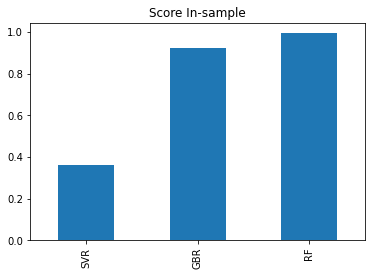

In [340]:
df_ev.iloc[2].plot(kind='bar',title='Score In-sample')

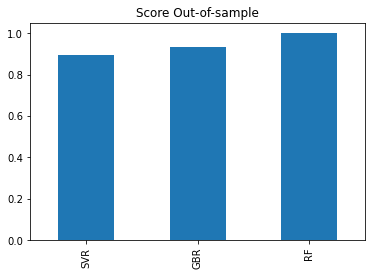

In [341]:
df_ev.iloc[3].plot(kind='bar',title='Score Out-of-sample')